(plotnine)=

# Plotnine

> plotnine is an implementation of a grammar of graphics in Python, it is based on ggplot2. The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot. Plotting with a grammar is powerful, it makes custom (and otherwise complex) plots easy to think about and then create, while the simple plots remain simple.



## Install Plotnine

To install plotnine with pip, use the command: 
> pip install plotnine

To install plotnine with conda, use the command:
> conda install -c conda-forge plotnine

## Import Plotnine
First, we need to import pandas, numpy, and plotnine with the following code. We also need to read the actual data.

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

url = 'https://raw.githubusercontent.com/statds/ids-s22/main/notes/data/nyc_mv_collisions_202201.csv'
nyc = pd.read_csv(url)
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     7659 non-null   object 
 1   CRASH TIME                     7659 non-null   object 
 2   BOROUGH                        5025 non-null   object 
 3   ZIP CODE                       5025 non-null   float64
 4   LATITUDE                       7097 non-null   float64
 5   LONGITUDE                      7097 non-null   float64
 6   LOCATION                       7097 non-null   object 
 7   ON STREET NAME                 5625 non-null   object 
 8   CROSS STREET NAME              3620 non-null   object 
 9   OFF STREET NAME                2034 non-null   object 
 10  NUMBER OF PERSONS INJURED      7659 non-null   int64  
 11  NUMBER OF PERSONS KILLED       7659 non-null   int64  
 12  NUMBER OF PEDESTRIANS INJURED  7659 non-null   i

It is easy to add elements of a plot with plotnine. We can write each necessary function one by one with a '+' sign.

## Histograms
With plotnine, we can create histogram plots. We can change how the count is visualized. By default it is the raw count, but it can be set to ncount (raw count normalized to 1), density, proportion (width*density), and percent_format. We must set either binwidth or the number of bins.

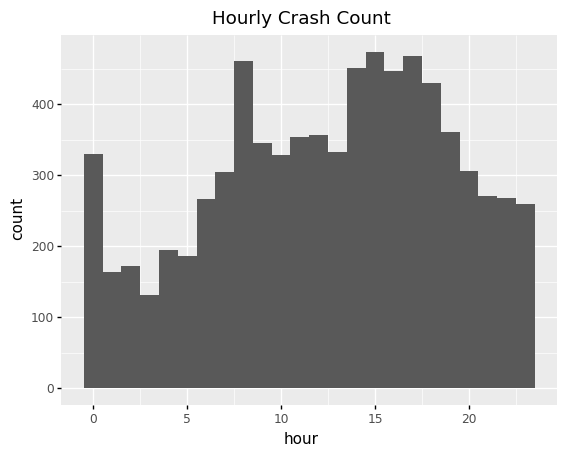

<ggplot: (8774828208915)>

In [2]:
nyc['hour'] = [x.split(':')[0] for x in nyc['CRASH TIME']]
nyc['hour'] = [int(x) for x in nyc['hour']]
(
    ggplot(nyc, aes(x = 'hour', y = after_stat('count')))
    + geom_histogram(binwidth = 1, bins = 24)
    + ggtitle("Hourly Crash Count")
)

We can easily add multiple plots. Here we add a plot of the same data with wider bins. We can make the histograms transparent with alpha. We can also set the color of the plot with fill.

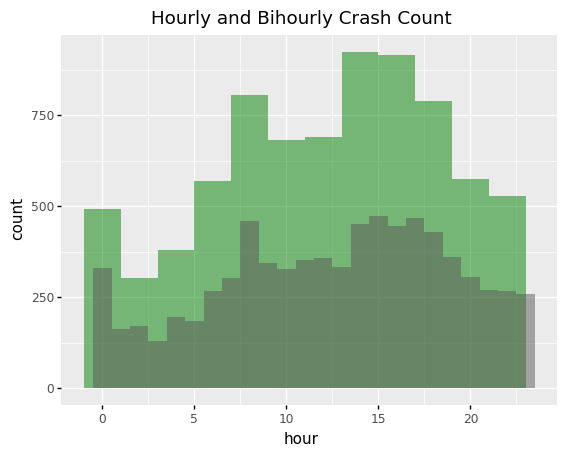

<ggplot: (8774762496681)>

In [3]:
(
    ggplot(nyc, aes(x = 'hour', y = after_stat('count')))
    + geom_histogram(binwidth = 2, alpha = 0.5, fill = 'green')
    + geom_histogram(binwidth = 1, alpha = 0.5)
    + ggtitle("Hourly and Bihourly Crash Count")
)

We can visualize the plots with respect to other variables. For the NYC example, we can fill each bin with respect to NYC boroughs.

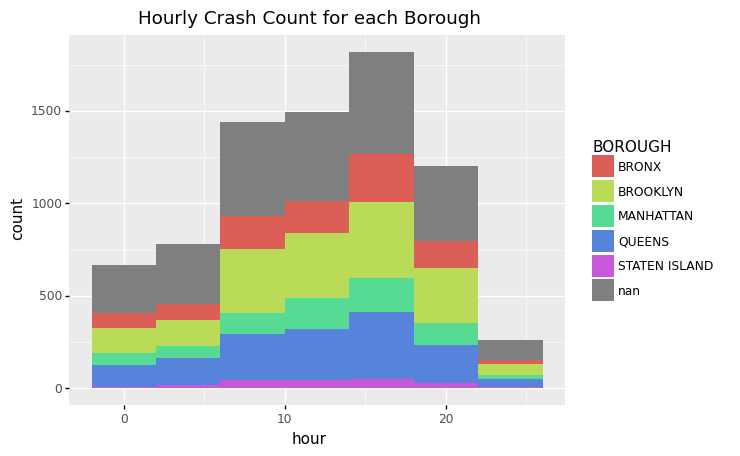

<ggplot: (8774762466301)>

In [4]:
(
    ggplot(nyc, aes(x = 'hour', y = after_stat('count'), fill = 'BOROUGH'))
    + geom_histogram(binwidth = 4)
    + ggtitle("Hourly Crash Count for each Borough")
)

Alternatively, we can split one plot into multiple plots using facet_wrap.

/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


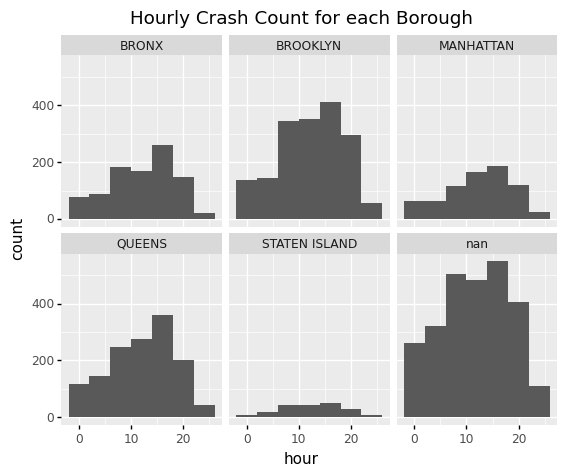

<ggplot: (8774762421390)>

In [5]:
(
    ggplot(nyc, aes(x = 'hour', y = after_stat('count')))
    + geom_histogram(binwidth = 4)
    + facet_wrap("BOROUGH")
    + ggtitle("Hourly Crash Count for each Borough")
)

## Boxplot
We can make boxplots with plotnine very easily. In this example, we adjust the angle of the x labels so that they do not overlap.

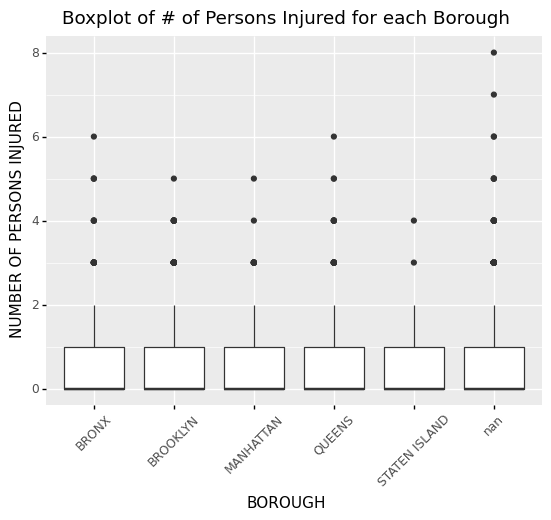

<ggplot: (8774762111883)>

In [6]:
theme_update(axis_text_x = element_text(angle = 45))
(
    ggplot(nyc, aes(x = 'BOROUGH', y = 'NUMBER OF PERSONS INJURED'))
    + geom_boxplot()
    + ggtitle("Boxplot of # of Persons Injured for each Borough")
)

## Violin Plot
Violin plots are similar to boxplots, but they also display the density for the numeric data.

findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


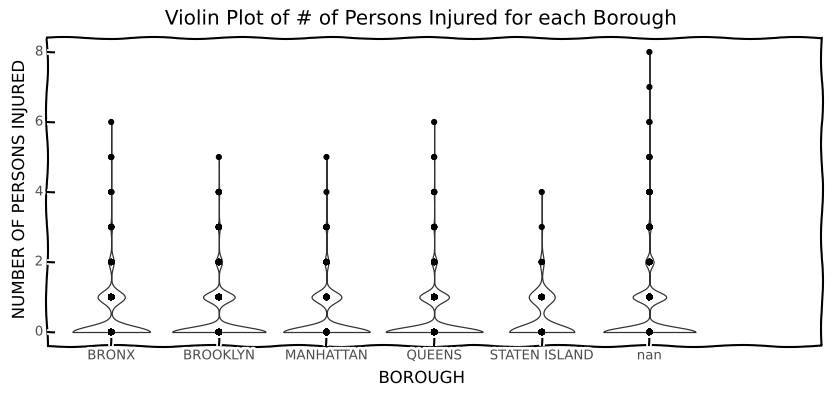

<ggplot: (8774762072254)>

In [7]:
theme_set(theme_xkcd)
theme_update(figure_size = (10, 4))
(
  ggplot(nyc, aes(x = 'BOROUGH', y = 'NUMBER OF PERSONS INJURED'))
  + geom_violin(nyc)
  + geom_point()
  + ggtitle("Violin Plot of # of Persons Injured for each Borough")
)

## Time Series
We can also make time series with plotnine. In our example we need to group the data by day and borough, and then reset the index to use both as a column variable.

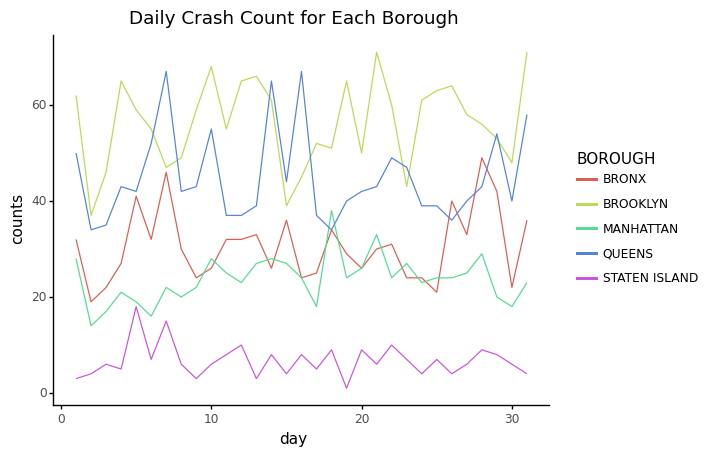

<ggplot: (8774761978760)>

In [8]:
theme_set(theme_classic)
nyc['day'] = [x.split('/')[1] for x in nyc['CRASH DATE']]
nyc['day'] = [int(x) for x in nyc['day']]
daily_counts = nyc.groupby(['day', 'BOROUGH'])['BOROUGH'].count()
daily_counts = daily_counts.reset_index(name = 'counts')

(
    ggplot(daily_counts, aes(x = 'day', y = 'counts', color = "BOROUGH"))
    + geom_line()
    + ggtitle("Daily Crash Count for Each Borough")
)

## Scatter Plot
With geom_point, we can make a simple scatter plot of our data. We can set LONGITUDE as X, LATITUDE as y, and we can color each point by BOROUGH. We can also set alpha so that we can visualize the density of the points.

/home/runner/work/ids-s22/ids-s22/env/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 582 rows containing missing values.


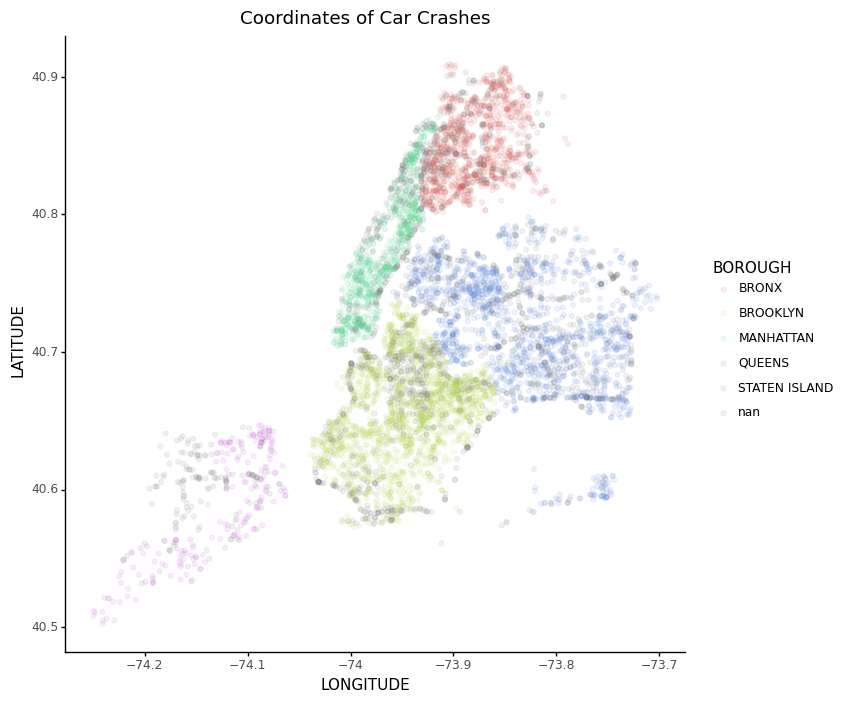

<ggplot: (8774761964581)>

In [9]:
  theme_update(figure_size = (8, 8))  
  nyc[nyc.LONGITUDE == 0] = np.nan
  nyc_plot = ggplot(nyc, aes(x = 'LONGITUDE', y = 'LATITUDE', color = 'BOROUGH'))
  nyc_plot + geom_point(alpha = 0.1) + ggtitle("Coordinates of Car Crashes")